#                                  # Learning Activations in Neural Networks 

# importing all the necessary libraries

In [86]:
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [87]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32')
y = to_categorical(y)

# splitting the dataset into train & test samples.

In [88]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=42)

# Building a complete neural network architecture

In [140]:
class NeuralNetwork():
    def __init__(self, network, epochs, learning_rate=0.01):
        self.network = network
        self.epochs = epochs
        self.learning_rate = learning_rate

        # Initializing all the parameters in a single dictionary 
        self.params = self.initialization()

    
    def initialization(self):


        # Initializing weights at every layer. if nodes at a particular Layer L0 are m, then we have m random weights initialized using HE Initialization.
        input_layer=self.network[0] #fetching no. of neuron for input layer
        hidden_layer1=self.network[1]  #fetching no. of neuron for hidden layer1
        hidden_layer2=self.network[2] #fetching no. of neuron for hidden layer2
        output_layer=self.network[3]  #fetching no. of neuron for output layer

        params = {
            'W1':np.random.randn(hidden_layer1, input_layer) * np.sqrt(2. / hidden_layer1),
            'W2':np.random.randn(hidden_layer2, hidden_layer1) * np.sqrt(2. / hidden_layer2),
            'W3':np.random.randn(output_layer, hidden_layer2) * np.sqrt(2. / output_layer)
        }

        return params

    def forward_propagation(self, train_x):
        params = self.params

        # feeding A0 as direct input to first layer.
        params['A0'] = train_x

        # weight by input multiplication between input layer and hidden layer 1
        params['Z1'] = np.dot(params["W1"], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        # weight by input multiplication between hidden layer1 and hidden layer2
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        # weight by input multiplication between hidden layer2 and output layer
        params['Z3'] = np.dot(params["W3"], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']

    def backward_propagation(self, train_y, output):
        
        # minimizing loss during back propagation by updating the weight parameters
        params = self.params
        changes_to_w = {}

        # updating new value for weight w3
        loss = 2 * (output - train_y) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        changes_to_w['W3'] = np.outer(loss, params['A2'])

        # updating new value for weight w2
        loss = np.dot(params['W3'].T, loss) * self.sigmoid(params['Z2'], derivative=True)
        changes_to_w['W2'] = np.outer(loss, params['A1'])

        # updating new value for weight w1
        loss = np.dot(params['W2'].T, loss) * self.sigmoid(params['Z1'], derivative=True)
        changes_to_w['W1'] = np.outer(loss, params['A0'])

        return changes_to_w


    def sigmoid(self, x, derivative=False):

        #calculation of sigmoid activation function with & without derivatives.
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

    def softmax(self, x, derivative=False):

        #
        exponential = np.exp(x - x.max())
        if derivative:
            return exponential / np.sum(exponential, axis=0) * (1 - exponential / np.sum(exponential, axis=0))
        return exponential / np.sum(exponential, axis=0)

    def update_network_parameters(self, changes_to_w):
        
        for key, value in changes_to_w.items():
            #print(" ",self.params[key],value)
            self.params[key] -= self.learning_rate * value

    def compute_accuracy(self, test_x, test_y):
       
        predictions = []

        for x, y in zip(test_x, test_y):
            output = self.forward_propagation(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))
        
        return np.mean(predictions)

    def trainNetwork(self, train_x, train_y, test_x, test_y):
        training_started_at = time.time()
        for iteration in range(self.epochs):
            epoch_time = time.time()
            for x,y in zip(x_train, y_train):
                output = self.forward_propagation(x)
                changes_to_w = self.backward_propagation(y, output)
                self.update_network_parameters(changes_to_w)

        
            
            accuracy = self.compute_accuracy(x_val, y_val)
            print('Epoch: {0}, Time Taken: {1:.2f}s, Accuracy: {2:.3f}%'.format(
                iteration+1, time.time() - epoch_time, accuracy * 100
            ))
        print('Total Time Taken to Train the Network for {0} Epochs: {1:.2f}s '.format(self.epochs,time.time()- training_started_at))

# Calling the network

In [141]:
NN = NeuralNetwork(network=[784, 256, 128, 10],epochs=10)
NN.trainNetwork(train_x, train_y, test_x, test_y)

Epoch: 1, Time Taken: 99.46s, Accuracy: 78.238%
Epoch: 2, Time Taken: 98.52s, Accuracy: 80.467%
Epoch: 3, Time Taken: 98.57s, Accuracy: 81.686%
Epoch: 4, Time Taken: 98.84s, Accuracy: 82.295%
Epoch: 5, Time Taken: 98.84s, Accuracy: 88.133%
Epoch: 6, Time Taken: 98.53s, Accuracy: 89.143%
Epoch: 7, Time Taken: 99.15s, Accuracy: 89.695%
Epoch: 8, Time Taken: 99.56s, Accuracy: 90.133%
Epoch: 9, Time Taken: 99.16s, Accuracy: 90.486%
Epoch: 10, Time Taken: 98.41s, Accuracy: 90.733%
Total Time Taken to Train the Network for 10 Epochs: 989.04s 


In [142]:
print(hist.history)

{'loss': [1.5642837285995483, 0.8272741436958313, 0.6061676740646362, 0.5097596049308777, 0.45552995800971985], 'accuracy': [0.6732666492462158, 0.8304888606071472, 0.8590888977050781, 0.874155580997467, 0.8824666738510132], 'val_loss': [1.0205998420715332, 0.6555695533752441, 0.5242910981178284, 0.45775771141052246, 0.4179065525531769], 'val_accuracy': [0.8164666891098022, 0.8576666712760925, 0.8768666386604309, 0.8846666812896729, 0.8912000060081482]}


In [143]:
import matplotlib.pyplot as plt
import seaborn as sb

# Train Vs. test Accuracy

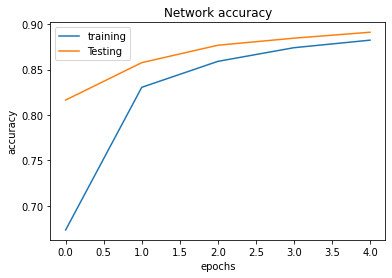

In [144]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Network accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training','Testing'], loc='best')
plt.show()

# Train Vs. test Error/Loss

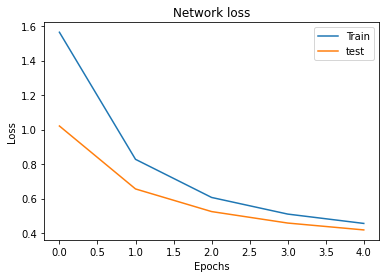

In [145]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Network loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'test'], loc='best')
plt.show()

In [146]:
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

# Model F1 Score Value

In [147]:
prediction = model.predict(train_x)

final_pred = np.argmax(prediction, axis=1)
test_y_final = np.argmax(train_y, axis=1)

print("F1 Score for the network is :",f1_score(test_y_final, final_pred, average='micro'))

F1 Score for the network is : 0.8879428571428571


In [148]:
cm = confusion_matrix(test_y_final, final_pred)

# Network's Confusion Matrix

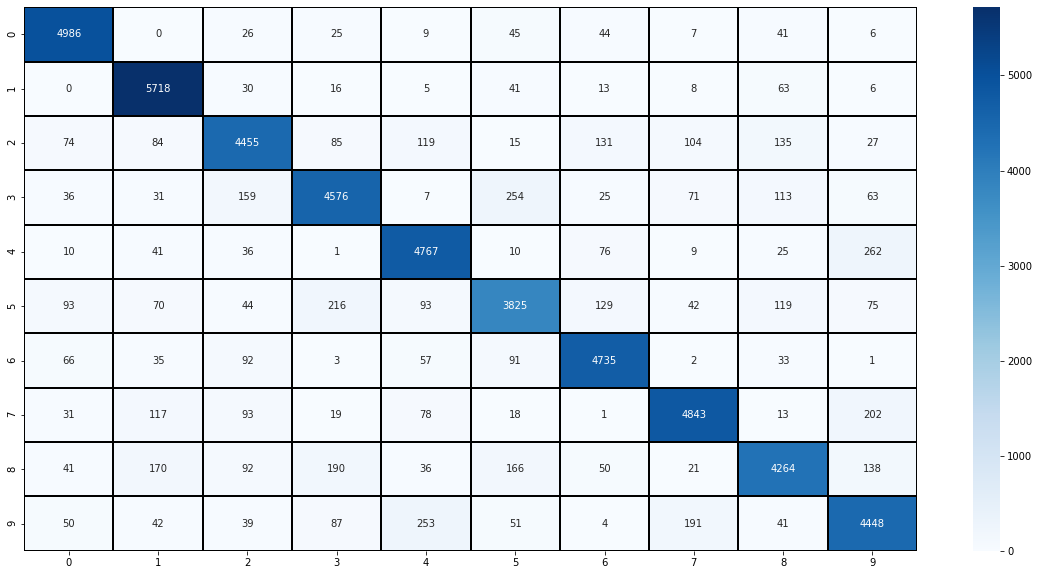

In [150]:
plt.figure(figsize = (20,10))
sb.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

# Final classification report

In [151]:
print(metrics.classification_report(test_y_final, final_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5189
           1       0.91      0.97      0.94      5900
           2       0.88      0.85      0.87      5229
           3       0.88      0.86      0.87      5335
           4       0.88      0.91      0.89      5237
           5       0.85      0.81      0.83      4706
           6       0.91      0.93      0.92      5115
           7       0.91      0.89      0.90      5415
           8       0.88      0.83      0.85      5168
           9       0.85      0.85      0.85      5206

    accuracy                           0.89     52500
   macro avg       0.89      0.89      0.89     52500
weighted avg       0.89      0.89      0.89     52500

